# Regression Problem - Predicting the Apparent Temperature

*data leakage is going to be prevented by using a large amount of data (weather reports) in the train and test sets

our dummy model - ?

tommorow:

## 3.random search, going over the models again

1.visualization , understanding and improving, writing better documentation after.

## 2.metrics - choosing mae/r2 , better understanding of the meaning
check out AUC!

4. catagorial features

## 5. feature selection, new features 

6. summing up and trying to explain to myself about the project



*** probability questions!
*** in friday and saturday explaining to someone else!

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


In [3]:
# read the dataset 
weather =pd.read_csv("weatherHistory[1].csv")

In [4]:
weather

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [5]:
weather 

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [6]:
#change misprint
weather=weather.rename(columns={'Loud Cover': 'Cloud Cover'})

# 1. getting to know the data

In [7]:
weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


### What are the features?
*Formatted Date - includes day, week , month, year

*Summary - sum up of the weather in words

*Precip Type - which type of raindrops there are

*Temperature (C) - temp in celcius

*Humidity - Humidity depends on the temperature and pressure .

*Wind Speed (km/h)	

*Wind Bearing (degrees)	- direction of the wind in degrees. For example , a wind blowing from the north has a wind direction referred to as 0° (360°); a wind blowing from the east has a wind direction referred to as 90°, etc.
<!-- The term "wind direction" is defined as the compass heading FROM which the wind is blowing -->

*Visibility (km) - visibility is a measure of the distance at which an object or light can be clearly discerned.	

*Cloud Cover	(loud cover- misprint)

*Pressure (millibars) - High pressure means the air is heavy . Under high pressure you can generally expect sunny skies and calm weather , whereas Low pressure systems lead to active weather like wind and rain, and also severe weather.

*Daily Summary - daily sum up of the weather in words


## What is the target variable?

Apparent Temperature : in simple words, Apparent Temperature is the temperature humans percieve, mostly outdoors, as a combination or the actual air temperature, humidity and wind. 

What else do we know?


*we are starting with 12 variables (including the dependent)



<!-- is The perceived temperature in degrees Fahrenheit derived from either a combination of temperature and wind (Wind Chill) or temperature and humidity (Heat Index) for the indicated hour. -
->




<!-- 1. Because the response variable is continuous, this is a regression problem.
2.There are 96453 observations (represented by the rows), and each observation is a weather report from a different date.
 -->

### the numeric variables histogramas:

here we can see the distribution of the numeric features, and approximately understand the most frequent values of each feature

array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Apparent Temperature (C)'}>,
        <AxesSubplot:title={'center':'Wind Speed (km/h)'}>],
       [<AxesSubplot:title={'center':'Wind Bearing (degrees)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>],
       [<AxesSubplot:title={'center':'Cloud Cover'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

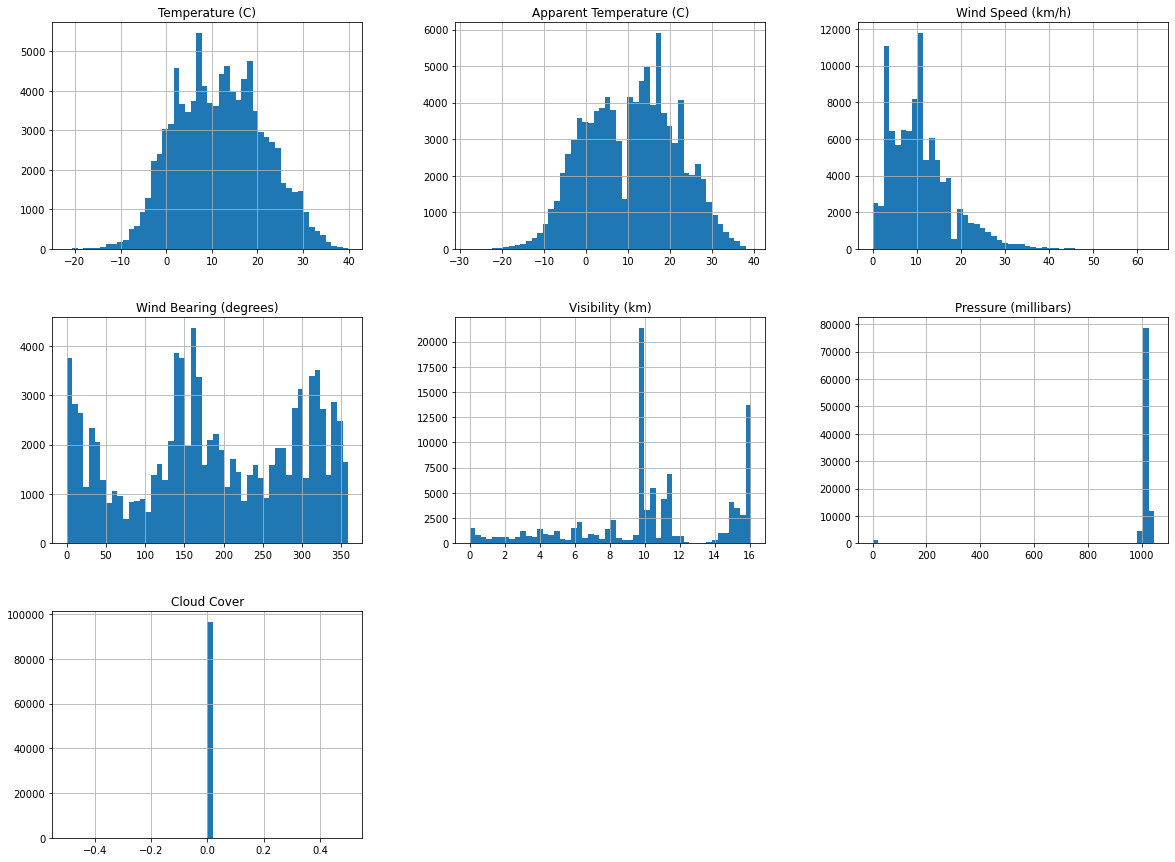

In [8]:
atttibutes_hist = weather[["Temperature (C)", "Apparent Temperature (C)", "Wind Speed (km/h)","Wind Bearing (degrees)",'Visibility (km)', "Pressure (millibars)",'Cloud Cover']].hist(bins=50, figsize=(20,15))
atttibutes_hist

as we can see, cloud cover has only values of 0 , so we should delete it 

In [9]:
del weather['Cloud Cover']

# 2. preprocessing of the data

In [10]:
weather.dropna()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


In [11]:
weather.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                  True
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

as we can see, there is still nan values in the Precip Type column.

we will handle this by fill in the most common catagory of this feature (rain) instead of the nan values 

In [12]:
print(weather['Precip Type'].value_counts())

rain    85224
snow    10712
Name: Precip Type, dtype: int64


In [13]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
weather['Precip Type'] = weather['Precip Type'].fillna("rain")


#### Precip Type, Temperature, wind speed , Wind Bearing, pressure are features that supposed to be  linked very strongly with the Apparent Temperature (according to the information we read), they are crucial for the prediction of the Apparent Temperature. 

on the other hand, daily summary is not that beneficial,  since we have the column Precip Type and also Summary.



In [14]:
del weather['Daily Summary']

now , we will split the 'Formatted Date' feature to 4 different numeric attributes in order to get a better understanding of the data  

In [15]:
import datetime

In [16]:
weather['Formatted Date'] = pd.to_datetime(weather['Formatted Date'],utc=True)

In [17]:
weather['year'] = weather['Formatted Date'].dt.year
weather['month'] = weather['Formatted Date'].dt.month
weather['day'] = weather['Formatted Date'].dt.day
weather['weekday'] = weather['Formatted Date'].dt.weekday

In [18]:
del weather['Formatted Date']

In [19]:
weather

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day,weekday
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,3,31,4
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,3,31,4
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1,5
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1,5
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,2016,9,9,4
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,2016,9,9,4
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,2016,9,9,4
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,2016,9,9,4


# getting rid of outliers:


In [20]:
print(weather['Summary'].value_counts())

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [21]:
weather = weather[(weather['Summary'] != "Dangerously Windy and Partly Cloudy") &( weather['Summary'] != "Breezy and Dry") & (weather['Summary']!="Windy and Dry") ]
print(weather['Summary'].value_counts())

Partly Cloudy               31733
Mostly Cloudy               28094
Overcast                    16597
Clear                       10890
Foggy                        7148
Breezy and Overcast           528
Breezy and Mostly Cloudy      516
Breezy and Partly Cloudy      386
Dry and Partly Cloudy          86
Windy and Partly Cloudy        67
Light Rain                     63
Breezy                         54
Windy and Overcast             45
Humid and Mostly Cloudy        40
Drizzle                        39
Windy and Mostly Cloudy        35
Breezy and Foggy               35
Dry                            34
Humid and Partly Cloudy        17
Dry and Mostly Cloudy          14
Rain                           10
Windy                           8
Humid and Overcast              7
Windy and Foggy                 4
Name: Summary, dtype: int64


In [22]:
weather['Summary']=='Foggy'

0        False
1        False
2        False
3        False
4        False
         ...  
96448    False
96449    False
96450    False
96451    False
96452    False
Name: Summary, Length: 96450, dtype: bool

### replacing a feature with a better one ??? בינתיים מחקתי את שני המשתנים שיצרתי middle of year ו wind- visibility  כי ראיתי שהם לא תורמים ממש לחיזוי , קורולציה סבירה אבל יש דברים אחרים שצריך לטפל שבהם כמו טיפול באינפיניטי 

# checking the relations between humidity and pressure, according to information we've read

As humidity increases pressure decreases

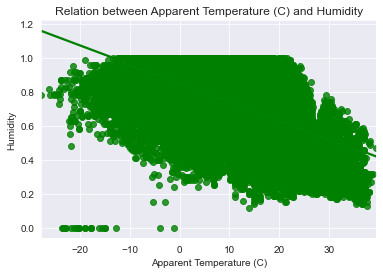

In [23]:
sns.set_style("darkgrid")
sns.regplot(data=weather, x="Apparent Temperature (C)", y="Humidity", color="g")
plt.title("Relation between Apparent Temperature (C) and Humidity")
plt.show()

There is a Linear Relation between “Apparent Temperature ” and “Humidity” with a negative slope. As air temperature increases, air can hold more water molecules, and its relative humidity decreases. When temperatures drop, relative humidity increases.

In [24]:
# sns.pairplot(weather, kind='scatter')

<AxesSubplot:>

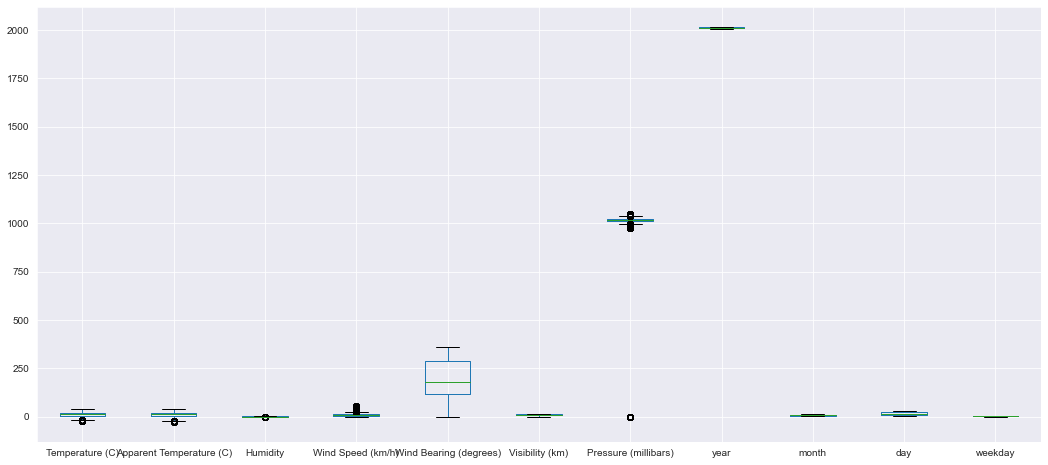

In [25]:
weather.boxplot(figsize=(18,8))

In [26]:
#weather['wind-visibility-ratio']=weather['Wind Speed (km/h)']/weather['Visibility (km)']

In [ ]:
# atttibutes_hist = weather[["Temperature (C)","month",'Humidity']].hist(bins=50, figsize=(20,15))
# atttibutes_hist

In [ ]:
#sns.pairplot(weather, x_vars=['month'], y_vars='Apparent Temperature (C)', height=7, aspect=0.7, kind='reg')

conclusion: when humidity is low, pressure is high

#### as we can see above, the Apparent Temperature  is higher in the months that are in the middle of the year.

####  so, we can create a feature that checks if the month is in the middle of the year , or the beggining or the end - we will set the beggining of the middle to be the 5th month, and the end of the middle to be the 9th month

#### this feature will be called: "middle of year" and will have yes/no values.

#### this is a good idea to replace this feature with the "month" feature , since it's giving us a more intuitive relation with the Apparent Temperature, and it probably has a  stronger correlation to it.

In [ ]:
#weather['middle of year']=(weather['month']>5) & (weather['month']<9)

In [ ]:
#sns.pairplot(weather, x_vars=['middle of year'], y_vars='Apparent Temperature (C)', height=7, aspect=0.7, kind='reg')

as we can see in the correlation below:

In [ ]:
corr_matrix = weather.corr()
corr_matrix['Apparent Temperature (C)'].sort_values(ascending=False)

## 1.2 encoding catagorial data

we need to encode Summary, Precip Type and middle of year to numeric columns

In [27]:
# i will save the original dataFrame for a later use, for example , for the data visualization.
weather_copy=weather.copy()

In [28]:
weather_copy

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day,weekday
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,3,31,4
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,3,31,4
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1,5
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1,5
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,2016,9,9,4
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,2016,9,9,4
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,2016,9,9,4
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,2016,9,9,4


In [29]:
weather['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [30]:
#print(weather['middle of year'].value_counts())

In [31]:
# or 
print(weather['Precip Type'].value_counts())

rain    85738
snow    10712
Name: Precip Type, dtype: int64


If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1. and because the 'Precip Type' column has only 2 catagoreis:

In [32]:
precip_types = {'rain':0,'snow':1}
weather['precip_type']= weather['Precip Type'].map(precip_types)

In [33]:
weather['precip_type']

0        0
1        0
2        0
3        0
4        0
        ..
96448    0
96449    0
96450    0
96451    0
96452    0
Name: precip_type, Length: 96450, dtype: int64

In [34]:
weather['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle',
       'Dry and Mostly Cloudy', 'Rain'], dtype=object)

In contrast to the 'precip_type' column , the Summary column has a lot of catagories, so we will use labelEncoder in order to transform the non-numerical labels to numerical labels  


In [35]:
from sklearn import preprocessing
lbl_encoder=preprocessing.LabelEncoder()
weather['summary'] = lbl_encoder.fit_transform(weather['Summary'])
weather['summary'].unique()

array([17, 15, 16, 10,  2,  5,  4,  3, 11, 13, 20, 22,  1, 23,  0,  9, 21,
        7, 19, 12, 14,  6,  8, 18])

now, after we encoded these values, we need to handle another problem:
the machine learning model may assume that there is some correlation between these variables, which will produce the wrong output. So to remove this issue, we will use dummy encoding.

For Dummy Encoding, we will use OneHotEncoder class of preprocessing library.

In [36]:
# #for Country Variable  
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder  
# label_encoder_x= LabelEncoder()  
# weather['Precip Type']= label_encoder_x.fit_transform(weather['Precip Type'])  
# #Encoding for dummy variables  
# onehot_encoder= OneHotEncoder(categories=weather['Precip Type'])    


# pre= onehot_encoder.fit_transform(pre).toarray()  

In [37]:
# dummy encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)


In [38]:
ohe.fit_transform(weather[['summary']])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
ohe.categories_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23])]

In [40]:
ohe.fit_transform(weather[['precip_type']])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [41]:
weather['precip_type']

0        0
1        0
2        0
3        0
4        0
        ..
96448    0
96449    0
96450    0
96451    0
96452    0
Name: precip_type, Length: 96450, dtype: int64

In [42]:
#ohe.fit_transform(weather[['middle of year']])

In [43]:
#weather['middle of year']=weather['middle of year'].astype(int)

In [44]:
(weather[['precip_type']]==1.).count()

precip_type    96450
dtype: int64

In [45]:
weather

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day,weekday,precip_type,summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,3,31,4,0,17
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,3,31,4,0,17
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1,5,0,15
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1,5,0,17
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1,5,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,2016,9,9,4,0,17
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,2016,9,9,4,0,17
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,2016,9,9,4,0,17
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,2016,9,9,4,0,17


## 1.3 doing onehotencoding at the same time on both of the categorial columns


In [46]:
#weather['middle of year']=pd.get_dummies(weather['middle of year'])

In [47]:
# use when different features need different preprocessing
from sklearn.compose import make_column_transformer



In [48]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['Summary']),
    remainder='passthrough')

In [49]:
# X=column_trans.fit_transform(X)

In [50]:
X

NameError: name 'X' is not defined

now, we will remove Summary and Precip Type columns, cause we alredy made the numeric version of them(summary,precip_type)

In [51]:
del weather['Summary']
del weather['Precip Type']

In [52]:
pd.DataFrame(data={'features': weather.columns})

,features
0,Temperature (C)
1,Apparent Temperature (C)
2,Humidity
3,Wind Speed (km/h)
4,Wind Bearing (degrees)
5,Visibility (km)
6,Pressure (millibars)
7,year
8,month
9,day


# 3. data visualization

 using the preproccessed dataFrame, before scaling, 
in order to get meaningful and clear picture of the data

In [ ]:
# import matplotlib.pyplot as plt
# weather.plot(x='Apparent Temperature (C)', y=["precip_type"])
# plt.show()

In [ ]:
AT_column = weather['Apparent Temperature (C)']

In [ ]:
AT_column.plot(kind="hist")
AxesSubplot='Frequency'

##### this means that the most frequent Apparent Temperature is in the range between 10 to 20 celcius

In [ ]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


In [ ]:
# import matplotlib
# import seaborn as sns
# import matplotlib.pyplot as plt
# import plotly.express as px
# %matplotlib inline

# fig , axs = plt.subplots(ncols=7,nrows=2, figsize=(20,10))

# for k ,v in weather.items():
#     sns.boxplot(y=k, data=weather, ax=axs[index])
#     index +=1
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
ax = sns.boxplot(x=weather['Apparent Temperature (C)'])

In [ ]:
fig , axs = plt.subplots(ncols=7,nrows=2, figsize=(20,10))
index=0
axs= axs.flatten()
for k ,v in weather.items():
    sns.boxplot(y=k, data=weather , ax=axs[index])
    index +=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

*temperature ,apparant temperature and humidity features has outliers after the min, but not a lot

*wind speed and summary - a lot of outliers , varies less and therefore, easier to predict

*most of  the values of wind bearing and visibility features are in the top 50% - the higher values , in contrast to apparant temperature and humidity.

*middle of year and precif type doesn't have a median 

# correlations

### correlation matrix

In [ ]:
#weather['wind-visibility-ratio']=weather['Wind Speed (km/h)']/weather['Visibility (km)']

In [ ]:
#weather.describe()[['humidity-wind-ratio', 'wind-visibility-ratio','Visibility (km)']]

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(weather.corr(),annot=True);

as we can see from the heatmap above, the correlation between the Apparent Temperature to the pressure is very low

In [ ]:
# del weather['Pressure (millibars)']
del weather['weekday']
del weather['day']
del weather['year']

# numerical  features correlation:

In [ ]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(weather, x_vars=['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)'], y_vars='Apparent Temperature (C)', height=7, aspect=0.7, kind='reg')

In [ ]:
sns.scatterplot(data=weather, x='Visibility (km)', y="Wind Speed (km/h)")

*we can see clearly that there's a strong correlation between temperature and apparent temperatue, 
* 

In [ ]:
import seaborn as sns; #sns.set_theme(color_codes=True)
ax = sns.regplot(x='Wind Speed (km/h)', y="Apparent Temperature (C)", data=weather)

In [ ]:
# import seaborn as sns
# sns.set_theme(style="whitegrid")
# ax = sns.boxplot(x="Visibility (km)", y="Wind Speed (km/h)", data=weather)

# categorial features correlation:

In [ ]:
weather_copy

In [ ]:
# weatheבםפט['Summary'].unique()

we took samples of catagories from the "Summary" feature, in order to see the relations between this feature and the "Precip Type" feature with Wind Speed

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.stripplot(x="Summary", y='Apparent Temperature (C)',hue='Precip Type',order=['Rain','Partly Cloudy','Overcast','Foggy','Breezy'], data=weather_copy , linewidth= 1, size=5)

*here we can see what we think intuitively - the apparent temperature, i.e., the temperature we as humans feel is higher when there's snow comparing to when it rains. 

*We assumed that if there's an overcast, the apparent temperatue is lower, but here we can see that it's not neccesarily the case, so we can't say there's a strong correlation between the overcast catagory in Summary and the apparent temperatue.

*another thing we see here is that when it rains, the apparent temperature can vary from 0 to 40 approximately, which means that it's hard to predict what temperature  we would feel when the precip type is rain. 

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.stripplot(x="Summary", y="Wind Speed (km/h)",hue='Precip Type',order=['Rain','Partly Cloudy','Overcast','Foggy','Breezy','Dry'], data=weather_copy , linewidth= 1, size=5)

In [ ]:
# fig, axes = plt.subplots(2, 2, figsize=(15, 15))
# fig.suptitle('categorial features:')
# ax = sns.swarmplot(x=weather_copy["Summary"])

now let's see the correlation between the features after the few changes we did:

In [ ]:
corr_matrix = weather.corr()
corr_matrix['Apparent Temperature (C)'].sort_values(ascending=False)

# 4. choosing a regression metric -

### We chose Mean abs error and R square as  metrics due to the explanations below and also beacause of the following dummy model results   (mae had a better result than rmse)
### later on we will choose one of them as a metric to our best model for the data, depending on how well it works with each model

##### Mean Squared Error (MSE)

The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset

when MSE is used as a loss function (regression metric), a lot of weight is given to larger errors because of the square
The units of the MSE are squared units.

A model that achieves an MSE better than the MSE for the naive model has skill.

In [ ]:
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

In [ ]:
# example of calculate the mean squared error
# real value
expected = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# predicted value
predicted = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
# calculate errors
errors = mean_squared_error(expected, predicted)
# report error
print(errors)

##### Root Mean Squared Error

the units of the RMSE are the same as the original units of the target value that is being predicted, in contrast to MSE.
this is the advantage comapring to MSE.

In [ ]:
mean_squared_error(y_true, y_pred, squared=False)

#### Mean abs error

like RMSE, the units of the error score match the units of the target value that is being predicted.

Unlike the RMSE, the changes in MAE are linear and therefore intuitive.

In [ ]:
# example of calculate the mean absolute error
# from sklearn.metrics import mean_absolute_error
# # real value
# expected = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# # predicted value
# predicted = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
# # calculate errors
# errors = mean_absolute_error(expected, predicted)
# # report error
# print(errors)

*The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of R square is considered desirable.

#### R Square

R Squared & Adjusted R Squared are used for explaining how well the independent variables in the linear regression model explains the variability in the dependent variable.

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

# 5. Split the data to train and test

In [53]:
X = weather.drop(['Apparent Temperature (C)'],axis=1)
y = weather['Apparent Temperature (C)']

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [55]:
#train=X_train

In [57]:
X_train

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day,weekday,precip_type,summary
43343,16.138889,0.99,13.2020,341.0,5.0715,1014.81,2010,9,17,4,0,16
73217,3.883333,0.82,14.0070,131.0,14.8120,1015.93,2014,1,16,3,0,15
68219,12.105556,0.62,25.1160,139.0,15.8263,1013.59,2013,11,19,1,0,17
33460,5.000000,0.86,22.5400,150.0,9.9820,1013.20,2009,11,30,0,0,17
35371,9.977778,0.66,19.9479,300.0,11.2056,1016.30,2010,4,2,4,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...
6265,14.511111,0.84,5.1198,137.0,14.5866,1018.20,2006,5,26,4,0,15
54888,-9.444444,0.80,3.2200,340.0,6.1180,1030.00,2012,2,11,5,1,16
76823,7.800000,0.87,10.9319,90.0,7.9695,1010.18,2014,11,13,3,0,17
860,19.161111,0.82,0.7728,121.0,9.9820,1012.44,2006,8,14,0,0,15


In [58]:
X_test.shape

(19290, 12)

In [59]:
y_train

43343    16.138889
73217     0.555556
68219    12.105556
33460     0.794444
35371     7.366667
           ...    
6265     14.511111
54888    -9.444444
76823     5.844444
860      19.161111
15796     2.361111
Name: Apparent Temperature (C), Length: 77160, dtype: float64

## Scaling


את הנירמול לא נעשה על משתנים קטגרויאליים ושמיים שעשינו עליהם כבר encoding  
,כי אין אפשרות להשוות
ניצור גאטא פריים חדש מנורמל
את הויזואליצזיה של הדאטא נעשה על הדאטא פריים המקורי, הלא מנורמל, כדי שנראה את המידע בצורה ברורה ונראה מה המספרים מייצגים

we will do the scaling only on numerical features i.e not on the categorial . 
 i.e , the features we didn't encoded

In [60]:
X_train.head()
# delete presure , day month weekday ...
#percip type and summary are catagorials

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day,weekday,precip_type,summary
43343,16.138889,0.99,13.2020,341.0,5.0715,1014.81,2010,9,17,4,0,16
73217,3.883333,0.82,14.0070,131.0,14.8120,1015.93,2014,1,16,3,0,15
68219,12.105556,0.62,25.1160,139.0,15.8263,1013.59,2013,11,19,1,0,17
33460,5.000000,0.86,22.5400,150.0,9.9820,1013.20,2009,11,30,0,0,17
35371,9.977778,0.66,19.9479,300.0,11.2056,1016.30,2010,4,2,4,0,15


In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler_standard = StandardScaler()
scaler_MinMax = MinMaxScaler()

In [63]:
X_train_standardized = X_train.copy()
X_test_standardized = X_test.copy()
X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()

In [64]:
numerical_features = ["Temperature (C)","Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Pressure (millibars)","month"]

In [65]:
# Standardization:
scaler_standard.fit(X_train[numerical_features])
X_train_standardized[numerical_features] = scaler_standard.transform(X_train_standardized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
#only transform on the test data
X_test_standardized[numerical_features] = scaler_standard.transform(X_test_standardized[numerical_features])

In [66]:
print('note: the mean is 0 and std is 1')
X_train_standardized.describe()[numerical_features].iloc[[1, 2]]

note: the mean is 0 and std is 1


,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month
mean,-1.368915e-16,2.460030e-16,-4.782567e-17,8.774589e-17,3.196121e-16,9.195761e-17,-4.968262e-16
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00


In [67]:
# Normalization:
scaler_MinMax.fit(X_train[numerical_features])
X_train_normalized[numerical_features] = scaler_MinMax.transform(X_train_normalized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
#only transform on the test data
X_test_normalized[numerical_features] = scaler_MinMax.transform(X_test_normalized[numerical_features])

In [68]:
print('note: the mean is 0 and std is 1')
X_train_standardized.describe()[numerical_features].iloc[[1, 2]]

note: the mean is 0 and std is 1


,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month
mean,-1.368915e-16,2.460030e-16,-4.782567e-17,8.774589e-17,3.196121e-16,9.195761e-17,-4.968262e-16
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00


In [69]:
X_train_scale=X_train.copy()
y_train_scale=y_train.copy()

deleting the encoded variables (categorials)

In [70]:
# del X_train_scale['summary']
# del X_train_scale['precip_type']

In [71]:
# from sklearn.preprocessing import MinMaxScaler

In [72]:
# scaling= MinMaxScaler()

*on the train set -fit and transform 

In [ ]:
#scaling.fit_transform(X_train_scale)

In [ ]:
#arr_y_train=np.array(y_train_scale)

In [ ]:
#scaling.fit_transform(arr_y_train.reshape(-1,1))

In [ ]:
#arr_x_test=np.array(X_train_scale)

*on the test set -transform only 

In [ ]:
#scaling.transform(arr_x_test.reshape(-1,1))

In [ ]:
#arr_y_test=np.array(y_train_scale)

In [ ]:
#scaling.transform(arr_y_test.reshape(-1,1))

In [ ]:
pd.DataFrame(index=range(len(train)))

## dealing with imbalanced data

*** in this part we do not touch the test set!
 
 
 we will only use the test set for the dummy model , and after the cross validation

the data is imbalanced as we can see from the histogram below

## dummy model

In [73]:
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_absolute_error as MAE



In [ ]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
R2_score = dummy_regr.score(X_test, y_test)
y_predict = dummy_regr.predict(X_test)
mae = MAE(y_test, y_predict)
rmse= mean_squared_error(y_test, y_predict, squared=False)


print ('The dummy model have a root mean squared error of '+ str(rmse) )

# errorsRMSE

In [ ]:
print('The dummy model have a R2 score of ' + str(R2_score)[:6] + " as expected (around 0), and mean absolute error of " + str(mae)[:4])

# The dummy model have a R2 score of -7.151 as expected (around 0), and mean absolute error of 9.02

In [ ]:
# dummy_regr = DummyRegressor(strategy="mean")
# dummy_regr.fit(X_train, y_train)
# dummy_regr.predict(X_train, y_train)
# dummy_regr.score(X_train, y_train)

# comparing different Regression Models

*cross validation allows us to compare different machine learning methods and get a sense of how well they will work in practice. the advantage here, is that it uses different blocks of data for train and test, and by that, "prepare" the model in the best way to predict outcome for new data  

 # Linear Regression

In [74]:
X_train.isnull().any()

Temperature (C)           False
Humidity                  False
Wind Speed (km/h)         False
Wind Bearing (degrees)    False
Visibility (km)           False
Pressure (millibars)      False
year                      False
month                     False
day                       False
weekday                   False
precip_type               False
summary                   False
dtype: bool

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [76]:
LR = LinearRegression()

In [77]:
y_train

43343    16.138889
73217     0.555556
68219    12.105556
33460     0.794444
35371     7.366667
           ...    
6265     14.511111
54888    -9.444444
76823     5.844444
860      19.161111
15796     2.361111
Name: Apparent Temperature (C), Length: 77160, dtype: float64

In [78]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

R2_scores_standardized = cross_val_score(LR, X_train_standardized, y_train, cv=kf)
y_predict_standardized = cross_val_predict(LR, X_train_standardized, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)

R2_scores_normalized = cross_val_score(LR, X_train_normalized, y_train, cv=kf)
y_predict_normalized = cross_val_predict(LR, X_train_normalized, y_train, cv=kf)
mae_normalized = MAE(y_train, y_predict_normalized)

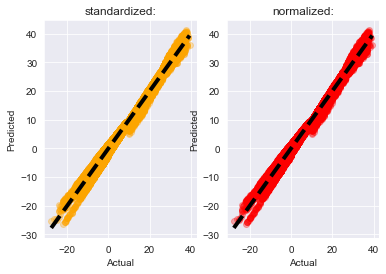

In [79]:
fig, axes = plt.subplots(1,2)
((ax1, ax2)) = axes

y_predicted = cross_val_predict(LR, X_train_standardized, y_train, cv=kf)
ax1.scatter(y_train, y_predicted, alpha=0.3, color='orange')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('standardized:')

y_predicted = cross_val_predict(LR, X_train_normalized, y_train, cv=kf)
ax2.scatter(y_train, y_predicted, alpha=0.3, color='red')
ax2.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('normalized:')

plt.show()

In [80]:
#standadized train set cross validation:

In [81]:
print("the scores of cross validation are:")
print(R2_scores_standardized)
print()
print("mean R2 is: " + str(R2_scores_standardized.mean())[:5] + " with std of  " + str(R2_scores_standardized.std())[:5] + " and MAE of " + str(mae_standarsized)[:6])

the scores of cross validation are:
[0.98984467 0.98992187 0.98953568 0.99001923 0.99003387 0.99003801
 0.99015419 0.98983277 0.98988167 0.99010023]

mean R2 is: 0.989 with std of  0.000 and MAE of 0.8442


In [82]:
#normalized train set cross validation:

In [83]:
print("the scores of cross validation are:")
print(R2_scores_normalized)
print()
print("mean R2 is: " + str(R2_scores_normalized.mean())[:5] + " with std of  " + str(R2_scores_normalized.std())[:5] + " and MAE of " + str(mae_normalized)[:6])

the scores of cross validation are:
[0.98984467 0.98992187 0.98953568 0.99001923 0.99003387 0.99003801
 0.99015419 0.98983277 0.98988167 0.99010023]

mean R2 is: 0.989 with std of  0.000 and MAE of 0.8442


although the results are the same with normalized and standardized,
we can see below that the feature values are definetly different 

In [84]:
X_train_normalized

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day,weekday,precip_type,summary
43343,0.614976,0.99,0.236039,0.949861,0.315,0.969829,2010,0.727273,17,4,0,16
73217,0.416434,0.82,0.250432,0.364903,0.920,0.970900,2014,0.000000,16,3,0,15
68219,0.549635,0.62,0.449050,0.387187,0.983,0.968663,2013,0.909091,19,1,0,17
33460,0.434524,0.86,0.402994,0.417827,0.620,0.968291,2009,0.909091,30,0,0,17
35371,0.515165,0.66,0.356649,0.835655,0.696,0.971253,2010,0.272727,2,4,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.588606,0.84,0.091537,0.381616,0.906,0.973069,2006,0.363636,26,4,0,15
54888,0.200522,0.80,0.057571,0.947075,0.380,0.984346,2012,0.090909,11,5,1,16
76823,0.479885,0.87,0.195452,0.250696,0.495,0.965405,2014,0.909091,13,3,0,17
860,0.663937,0.82,0.013817,0.337047,0.620,0.967564,2006,0.636364,14,0,0,15


In [85]:
X_train_standardized

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day,weekday,precip_type,summary
43343,0.440377,1.304690,0.345909,1.428002,-1.258799,0.099433,2010,0.720724,17,4,0,16
73217,-0.843020,0.435013,0.462458,-0.527932,1.063801,0.108983,2014,-1.599400,16,3,0,15
68219,0.018008,-0.588136,2.070843,-0.453420,1.305659,0.089030,2013,1.300755,19,1,0,17
33460,-0.726083,0.639643,1.697884,-0.350966,-0.087901,0.085705,2009,1.300755,30,0,0,17
35371,-0.204812,-0.383506,1.322594,1.046130,0.203863,0.112137,2010,-0.729354,2,4,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.269916,0.537328,-0.824249,-0.472048,1.010055,0.128338,2006,-0.439338,26,4,0,15
54888,-2.238698,0.332698,-1.099306,1.418688,-1.009263,0.228951,2012,-1.309385,11,5,1,16
76823,-0.432868,0.690801,0.017239,-0.909805,-0.567777,0.059955,2014,1.300755,13,3,0,17
860,0.756862,0.435013,-1.453617,-0.621072,-0.087901,0.079225,2006,0.430708,14,0,0,15


# Random Forest Regressor

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [87]:
RFR = RandomForestRegressor()

In [88]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [89]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [95]:
R2_scores_standardized = cross_val_score(regr, X_train_standardized, y_train, cv=kf)
y_predict_standardized = cross_val_predict(regr, X_train_standardized, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)

In [96]:
R2_scores_normalized = cross_val_score(regr, X_train_normalized, y_train, cv=kf)
y_predict_normalized = cross_val_predict(regr, X_train_normalized, y_train, cv=kf)
mae_normalized = MAE(y_train, y_predict_normalized)

In [97]:
print("the scores of cross validation are:")
print(R2_scores_standardized)
print()
print("mean R2 is: " + str(R2_scores_standardized.mean())[:5] + " with std of  " + str(R2_scores_standardized.std())[:5] + " and MAE of " + str(mae_standarsized)[:6])

the scores of cross validation are:
[0.906155   0.90619885 0.90545287 0.90358161 0.90932135 0.90566268
 0.904728   0.90665612 0.9073574  0.90812116]

mean R2 is: 0.906 with std of  0.001 and MAE of 2.6576


In [98]:
print("the scores of cross validation are:")
print(R2_scores_normalized)
print()
print("mean R2 is: " + str(R2_scores_normalized.mean())[:5] + " with std of  " + str(R2_scores_normalized.std())[:5] + " and MAE of " + str(mae_normalized)[:6])

the scores of cross validation are:
[0.90615532 0.90619881 0.90545315 0.90358045 0.90932135 0.90566268
 0.90472898 0.90665444 0.90735481 0.90812116]

mean R2 is: 0.906 with std of  0.001 and MAE of 2.6576


the results are not so good with the MAE metric. we will try to decrese the MAE and increase the R2 with random search - choosing the best hyperparameter for the random forest model.

# random search

In [99]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [101]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid, n_iter = 100, cv = kf, verbose=2, random_state=42, n_jobs = -1, scoring='r2')
# Fit the random search model
rf_random.fit(X_train_normalized, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


# Random Forest Regressor standardized data Test

# Keras Regressions

In [ ]:
#! pip install keras

In [ ]:
#! pip install tensorflow

In [ ]:
X_train


In [ ]:

import tensorflow as tf

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
# Also, ADAM optimization algorithm is used for optimizing loss function (Mean squared error)

In [ ]:
keras.metrics.RootMeanSquaredError()

In [ ]:
model = Sequential()
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae',tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
y_test

In [ ]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test= np.asarray(X_test).astype(np.float32)
y_test= np.asarray(y_test).astype(np.float32)

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)
model.summary()

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [ ]:
model.history.history['val_mse']

In [ ]:
model.history.history['val_mae']

In [ ]:
model.history.history['val_root_mean_squared_error']

In [ ]:
# plot metrics
pyplot.plot(loss_df ['mse'])


In [ ]:
pyplot.plot(loss_df ['mae'])


In [ ]:
pyplot.plot(loss_df ['root_mean_squared_error'])

In [ ]:

print(loss_df.keys())

# hyperparameter tuning 
I will try to increase the R2 score and the MAE of the Random Forest Regressor model by choosing the best hyperparams.

## random search 

With small data sets and lots of resources, Grid Search will produce accurate results. However, with large data sets, the high dimensions will greatly slow down computation time and be very costly. Therefore, we chose to use random search for 

random search requires two arguments. The first is the model that you are optimizing. This is an instance of the model with values of hyperparameters set that you want to optimize. 
The second is the search space:
This is defined as a dictionary where the names are the hyperparameter arguments to the model and the values are discrete values or a distribution of values to sample in the case of a random search.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from scipy.stats import loguniform

In [ ]:
cv=RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
# define model
model = Ridge()
# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = loguniform(1e-5, 100)
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

# define search
# pattern - search = GridSearchCV(model, space)
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)

In [ ]:
# execute search
result = search.fit(X_train_normalized, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

For Conclusion:

what can we do better?

*use SMOGN or SMOTER to balance the data
*use other feature selection methods such as 